In [3]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
%matplotlib inline
from shapely.geometry import Point,Polygon

In [4]:
cities = gpd.read_file('Districts.shp')

<AxesSubplot:>

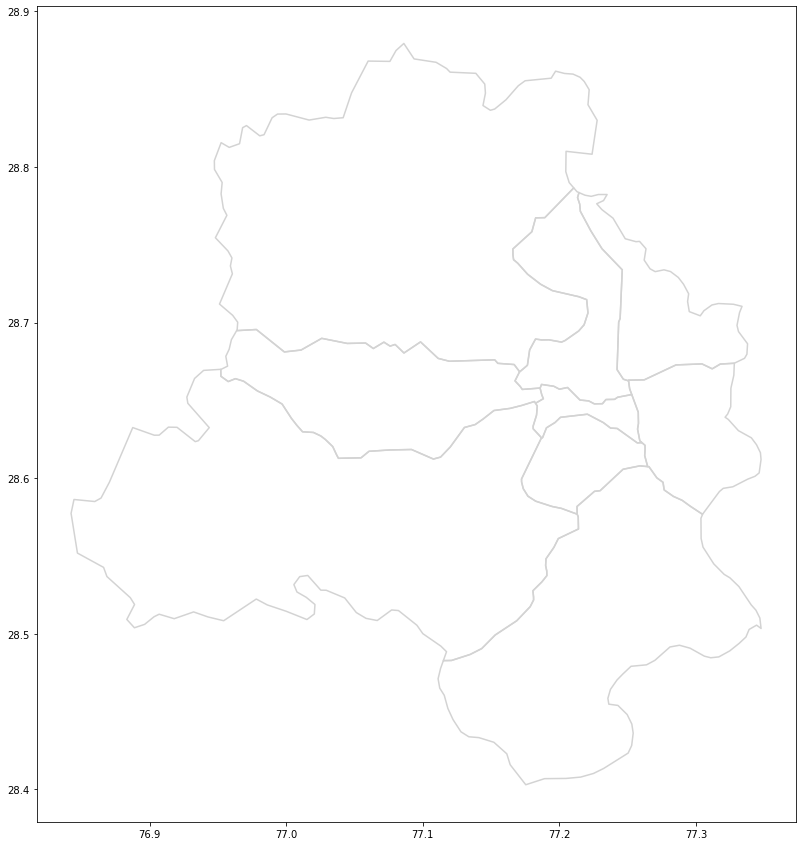

In [5]:
fig,ax = plt.subplots(figsize =(15,15))
cities.boundary.plot(ax=ax,color='lightgrey')

In [14]:
df= pd.read_csv('twitterpredplot.csv')

In [15]:
crs = {'init' : 'epsg:4326'}

In [16]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geometry[:3]

In [17]:
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

C:\Users\samik\anaconda3\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [19]:
geo_df.head()

,user,datetime,date,content,coordinates,longitude,latitude,hashtags,city,country,city1,tokenized_text,pred,geometry
0,https://twitter.com/Abh1sh3k_HM,2022-02-28 19:29:43+00:00,2022-02-28,Very much True da Where There comes natural pl...,"Coordinates(longitude=77.302126, latitude=28.4...",77.302126,28.443981,NaN,Noida,India,Noida,"['Very', 'much', 'True', 'da', 'Where', 'There...",joy,POINT (77.30213 28.44398)
1,https://twitter.com/Parikshit_Sriv9,2022-02-28 19:29:11+00:00,2022-02-28,US would oppressed world order blah blah,"Coordinates(longitude=76.707671, latitude=28.1...",76.707671,28.199529,NaN,Gurgaon,India,Gurgaon,"['US', 'would', 'oppressed', 'world', 'order',...",joy,POINT (76.70767 28.19953)
2,https://twitter.com/CASaurabhChabra,2022-02-28 19:28:10+00:00,2022-02-28,day,"Coordinates(longitude=76.84252, latitude=28.39...",76.842520,28.397657,NaN,New Delhi,India,New Delhi,['day'],joy,POINT (76.84252 28.39766)
3,https://twitter.com/MuditHastir,2022-02-28 19:27:44+00:00,2022-02-28,come You amazing,"Coordinates(longitude=76.84252, latitude=28.39...",76.842520,28.397657,NaN,New Delhi,India,New Delhi,"['come', 'You', 'amazing']",joy,POINT (76.84252 28.39766)
4,https://twitter.com/CapapieSports,2022-02-28 19:27:33+00:00,2022-02-28,Gold Air Rifle ongoing World Cup,"Coordinates(longitude=77.149786, latitude=28.1...",77.149786,28.156842,"['Capapie', 'GoldWithCapapie']",Faridabad,India,Faridabad,"['Gold', 'Air', 'Rifle', 'ongoing', 'World', '...",anger,POINT (77.14979 28.15684)


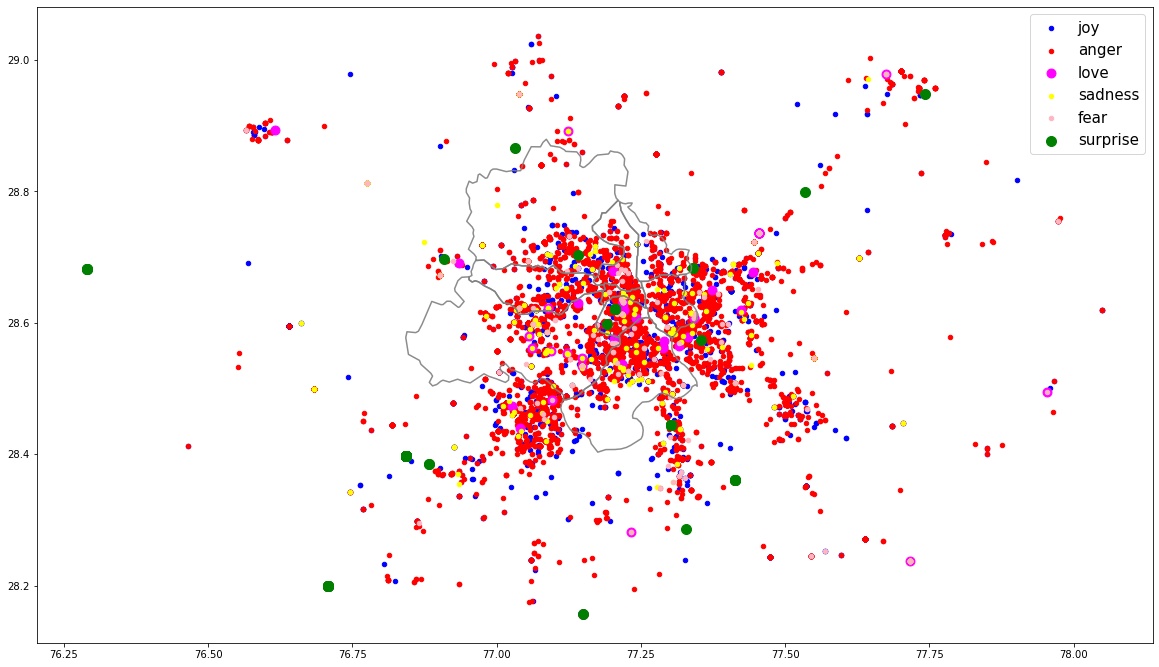

In [14]:
fig,ax = plt.subplots(figsize = (20,20))
cities.boundary.plot(ax=ax,alpha=0.9,color='grey')
geo_df[geo_df['pred'] == 'joy'].plot(ax=ax,markersize=20,color="blue",marker="o",label="joy")
geo_df[geo_df['pred'] == 'anger'].plot(ax=ax,markersize=20,color="red",marker="o",label="anger")
geo_df[geo_df['pred'] == 'love'].plot(ax=ax,markersize=80,color="magenta",marker="o",label="love")
geo_df[geo_df['pred'] == 'sadness'].plot(ax=ax,markersize=20,color="yellow",marker="o",label="sadness")
geo_df[geo_df['pred'] == 'fear'].plot(ax=ax,markersize=20,color="lightpink",marker="o",label="fear")
geo_df[geo_df['pred'] == 'surprise'].plot(ax=ax,markersize=100,color="green",marker="o",label="surprise")
plt.legend(prop={'size':15})

<AxesSubplot:>

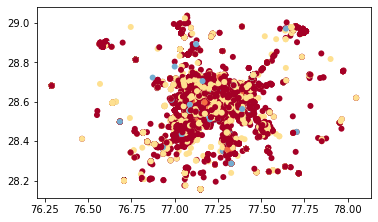

In [8]:
geo_df.plot(column='pred', scheme='Fisher_Jenks',
                         k=6, cmap='RdYlBu', linewidth=0)

In [28]:
pip install carto

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

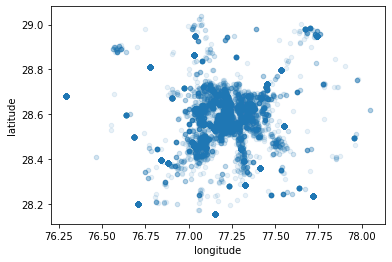

In [31]:
geo_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [43]:
from keplergl import KeplerGl
map1=KeplerGl(height=500)
map1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


A Jupyter Widget